In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [5]:
# Load the data
df = pd.read_csv('C:/Users/ASUS/Desktop/financial/Financial_Risk_Participants_Data_Train.csv')

In [6]:
df.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  543 non-null    int64  
 1   Location_Score        543 non-null    float64
 2   Internal_Audit_Score  543 non-null    int64  
 3   External_Audit_Score  543 non-null    int64  
 4   Fin_Score             543 non-null    int64  
 5   Loss_score            543 non-null    int64  
 6   Past_Results          543 non-null    int64  
 7   IsUnderRisk           543 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 34.1 KB


In [8]:
df.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


In [9]:
df.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

In [10]:
df.dtypes

City                      int64
Location_Score          float64
Internal_Audit_Score      int64
External_Audit_Score      int64
Fin_Score                 int64
Loss_score                int64
Past_Results              int64
IsUnderRisk               int64
dtype: object

In [11]:
df.corr()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
City,1.000000,0.012551,-0.024306,-0.049994,-0.051779,0.033183,0.004762,-0.087463
Location_Score,0.012551,1.000000,-0.358629,-0.205775,-0.264536,-0.042139,-0.074364,-0.423956
Internal_Audit_Score,-0.024306,-0.358629,1.000000,0.453839,0.365133,0.007685,0.112093,0.586097
External_Audit_Score,-0.049994,-0.205775,0.453839,1.000000,0.433374,-0.038786,0.141163,0.435619
Fin_Score,-0.051779,-0.264536,0.365133,0.433374,1.000000,-0.078573,0.138111,0.362463
Loss_score,0.033183,-0.042139,0.007685,-0.038786,-0.078573,1.000000,0.081858,0.044888
Past_Results,0.004762,-0.074364,0.112093,0.141163,0.138111,0.081858,1.000000,0.102120
IsUnderRisk,-0.087463,-0.423956,0.586097,0.435619,0.362463,0.044888,0.102120,1.000000


(543.5, -0.5)

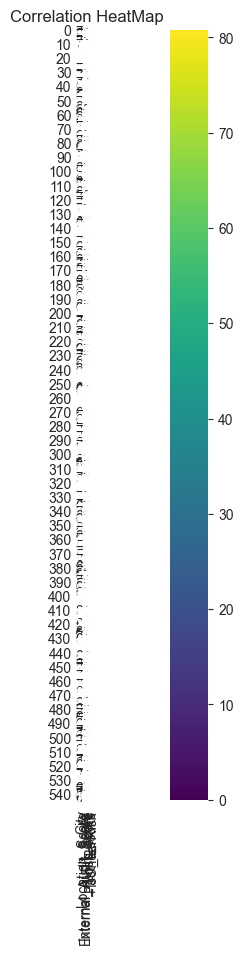

In [12]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(df,annot=True, cmap='viridis', linecolor ='white', square=1, linewidths=3)
plt.title('Correlation HeatMap')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [13]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (543, 7)
Shape of y: (543,)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [15]:
X_train

array([[42.   , 17.919,  3.   , ...,  4.   ,  8.   ,  0.   ],
       [ 8.   , 22.09 , 12.   , ...,  7.   ,  5.   ,  1.   ],
       [31.   , 77.73 ,  8.   , ...,  3.   ,  8.   ,  1.   ],
       ...,
       [31.   , 14.672, 11.   , ..., 11.   ,  5.   ,  0.   ],
       [28.   , 17.085, 12.   , ...,  3.   ,  6.   ,  1.   ],
       [40.   , 15.71 ,  3.   , ...,  6.   ,  5.   ,  0.   ]])

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
df_test = pd.read_csv('C:/Users/ASUS/Desktop/financial/Financial_Risk_Participants_Data_Test.csv')

In [18]:
df_test.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,41,18.272,13,12,9,7,0
1,17,64.799,6,10,7,4,1
2,31,68.890,3,3,7,8,0
3,3,16.492,15,10,7,4,1
4,9,17.178,7,3,8,3,1


In [19]:
X_test_new = df_test.iloc[:, :].values

In [20]:
X_test_new.shape

(233, 7)

In [21]:
X_test_new = sc.transform(X_test_new)

In [22]:
X_test_new

array([[ 1.44076297, -0.53937096,  1.43476947, ...,  0.60011355,
         0.80493643, -0.79240582],
       [-0.19558935,  1.35322535, -0.6925266 , ..., -0.03981097,
        -0.80741316,  0.44022545],
       [ 0.7589495 ,  1.5196365 , -1.60422492, ..., -0.03981097,
         1.3423863 , -0.79240582],
       ...,
       [-1.1501282 , -1.00618453, -0.38862716, ..., -0.99969776,
        -0.2699633 ,  0.44022545],
       [-1.1501282 , -0.90851815,  1.43476947, ...,  0.92007581,
         0.80493643,  0.44022545],
       [ 1.44076297,  1.46638981, -0.6925266 , ..., -1.31966002,
         0.26748657,  0.44022545]])

In [23]:
from sklearn.linear_model import LogisticRegression
classifier_logis = LogisticRegression(random_state = 0, solver='lbfgs')
classifier_logis.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [24]:
y_pred_logis = classifier_logis.predict(X_test)
print(np.concatenate((y_pred_logis.reshape(len(y_pred_logis),1), y_test.reshape(len(y_test),1)),1))


[[1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]]


In [25]:
y_prob_logis = classifier_logis.predict_proba(X_test)
print(y_prob_logis)


[[2.03460507e-01 7.96539493e-01]
 [6.47942763e-01 3.52057237e-01]
 [8.96180139e-01 1.03819861e-01]
 [5.40987764e-01 4.59012236e-01]
 [7.14052702e-01 2.85947298e-01]
 [2.43070139e-01 7.56929861e-01]
 [1.33260393e-02 9.86673961e-01]
 [1.95917342e-01 8.04082658e-01]
 [2.27750967e-01 7.72249033e-01]
 [7.93211688e-01 2.06788312e-01]
 [8.68992717e-01 1.31007283e-01]
 [9.48237046e-01 5.17629545e-02]
 [1.30077938e-01 8.69922062e-01]
 [8.98892084e-01 1.01107916e-01]
 [7.59288066e-01 2.40711934e-01]
 [4.24650405e-01 5.75349595e-01]
 [4.26655954e-01 5.73344046e-01]
 [5.20582910e-01 4.79417090e-01]
 [1.86410438e-03 9.98135896e-01]
 [9.03925190e-01 9.60748097e-02]
 [3.25109238e-02 9.67489076e-01]
 [1.35779255e-01 8.64220745e-01]
 [1.95201033e-03 9.98047990e-01]
 [1.69114886e-01 8.30885114e-01]
 [8.47176020e-01 1.52823980e-01]
 [9.10777908e-01 8.92220924e-02]
 [6.91610031e-01 3.08389969e-01]
 [1.17532709e-01 8.82467291e-01]
 [8.03717788e-02 9.19628221e-01]
 [3.82518890e-01 6.17481110e-01]
 [7.600098

In [26]:
conf_matrix_logis = confusion_matrix(y_test, y_pred_logis)
print(conf_matrix_logis)
accuracy_score(y_test, y_pred_logis)

[[37  8]
 [ 9 55]]


0.8440366972477065

In [27]:
scores_logis = cross_val_score(classifier_logis, X, y, cv=5)
print("Cross-validation scores: {}" . format(scores_logis))
print("Mean accuracy: {:.2f}" . format(scores_logis.mean()))
print("Standard Deviation: {:.2f}" . format(scores_logis.std()))


Cross-validation scores: [0.78899083 0.81651376 0.85321101 0.86111111 0.74074074]
Mean accuracy: 0.81
Standard Deviation: 0.04


In [28]:
param_grid = [{'kernel' : ['linear' ],
 'C' : [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids: \n{}" . format(param_grid))

List of grids: 
[{'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [29]:
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search. fit(X, y)
print("Best parameters: {}" . format(grid_search. best_params_))
print("Best cross-validation score: {:.2f}" . format(grid_search. best_score_))

Best parameters: {'C': 0.01, 'kernel': 'linear'}
Best cross-validation score: 0.82


In [31]:
classifier_svm = SVC(C=0.01, kernel = 'linear', random_state = 0, probability=True)
classifier_svm.fit(X_train, y_train)
y_pred_svm = classifier_svm.predict(X_test)
print(np.concatenate((y_pred_svm.reshape(len(y_pred_svm),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]]


In [32]:
y_prob_svm = classifier_svm.predict_proba(X_test)
print(y_prob_svm)

[[1.91749406e-01 8.08250594e-01]
 [7.09826030e-01 2.90173970e-01]
 [8.77542116e-01 1.22457884e-01]
 [6.50743214e-01 3.49256786e-01]
 [5.37712217e-01 4.62287783e-01]
 [2.36285773e-01 7.63714227e-01]
 [7.04844048e-02 9.29515595e-01]
 [1.45109503e-01 8.54890497e-01]
 [1.93552617e-01 8.06447383e-01]
 [7.99505689e-01 2.00494311e-01]
 [8.81818502e-01 1.18181498e-01]
 [9.33626287e-01 6.63737129e-02]
 [2.51427569e-01 7.48572431e-01]
 [8.99230800e-01 1.00769200e-01]
 [5.51765689e-01 4.48234311e-01]
 [3.40921635e-01 6.59078365e-01]
 [2.95450266e-01 7.04549734e-01]
 [4.39329276e-01 5.60670724e-01]
 [5.75222175e-03 9.94247778e-01]
 [8.95792423e-01 1.04207577e-01]
 [6.12165344e-02 9.38783466e-01]
 [1.76022136e-01 8.23977864e-01]
 [6.55068465e-03 9.93449315e-01]
 [1.62195598e-01 8.37804402e-01]
 [8.42457412e-01 1.57542588e-01]
 [8.90346529e-01 1.09653471e-01]
 [7.74429489e-01 2.25570511e-01]
 [1.52587624e-01 8.47412376e-01]
 [1.13508276e-01 8.86491724e-01]
 [4.88217224e-01 5.11782776e-01]
 [6.455650

In [33]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(conf_matrix_svm)
accuracy_score(y_test, y_pred_svm)

[[33 12]
 [ 9 55]]


0.8073394495412844

In [34]:
scores_svm = cross_val_score(classifier_svm, X, y, cv=5)
print("Cross-validation scores: {}" . format(scores_svm))
print("Mean accuracy: {:.2f}" . format(scores_svm.mean()))
print("Standard Deviation: {:.2f}" . format(scores_svm.std()))

Cross-validation scores: [0.79816514 0.85321101 0.8440367  0.85185185 0.76851852]
Mean accuracy: 0.82
Standard Deviation: 0.03


In [35]:
param_grid = [{'kernel' : ['rbf' ],
 'C' : [0.001, 0.01, 0.1, 1, 10, 100],
 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids: \n{}" . format(param_grid))

List of grids: 
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [36]:
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search. fit(X, y)
print("Best parameters: {}" . format(grid_search. best_params_))
print("Best cross-validation score: {:.2f}" . format(grid_search. best_score_))

Best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-validation score: 0.84


In [37]:
classifier_ksvm = SVC(C=100, kernel = 'rbf', gamma=0.001, random_state = 0, probability=True)
classifier_ksvm.fit(X_train, y_train)

SVC(C=100, gamma=0.001, probability=True, random_state=0)

In [38]:
y_pred_ksvm = classifier_ksvm.predict(X_test)
print(np.concatenate((y_pred_ksvm.reshape(len(y_pred_ksvm),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]]


In [39]:
y_prob_ksvm = classifier_ksvm.predict_proba(X_test)
print(y_prob_ksvm)

[[2.10743023e-01 7.89256977e-01]
 [6.83388397e-01 3.16611603e-01]
 [8.95259159e-01 1.04740841e-01]
 [5.78010859e-01 4.21989141e-01]
 [6.81700327e-01 3.18299673e-01]
 [2.67885383e-01 7.32114617e-01]
 [1.80779192e-02 9.81922081e-01]
 [1.94272596e-01 8.05727404e-01]
 [2.07749284e-01 7.92250716e-01]
 [7.79281239e-01 2.20718761e-01]
 [8.70779114e-01 1.29220886e-01]
 [9.40353746e-01 5.96462541e-02]
 [1.62774773e-01 8.37225227e-01]
 [8.98078512e-01 1.01921488e-01]
 [7.65073386e-01 2.34926614e-01]
 [4.72465476e-01 5.27534524e-01]
 [4.41717987e-01 5.58282013e-01]
 [5.69202666e-01 4.30797334e-01]
 [2.66913354e-03 9.97330866e-01]
 [8.86678146e-01 1.13321854e-01]
 [3.60163464e-02 9.63983654e-01]
 [1.78686902e-01 8.21313098e-01]
 [3.32625316e-03 9.96673747e-01]
 [1.61383812e-01 8.38616188e-01]
 [8.31642726e-01 1.68357274e-01]
 [9.06710924e-01 9.32890760e-02]
 [6.70209923e-01 3.29790077e-01]
 [1.24905186e-01 8.75094814e-01]
 [1.04601810e-01 8.95398190e-01]
 [4.05186741e-01 5.94813259e-01]
 [8.331076

In [40]:
conf_matrix_ksvm = confusion_matrix(y_test, y_pred_ksvm)
print(conf_matrix_ksvm)
accuracy_score(y_test, y_pred_ksvm)

[[39  6]
 [ 9 55]]


0.8623853211009175

In [41]:
scores_ksvm = cross_val_score(classifier_ksvm, X, y, cv=5)
print("Cross-validation scores: {}" . format(scores_ksvm))
print("Mean accuracy: {:.2f}" . format(scores_ksvm.mean()))
print("Standard Deviation: {:.2f}" . format(scores_ksvm.std()))

Cross-validation scores: [0.79816514 0.85321101 0.89908257 0.86111111 0.76851852]
Mean accuracy: 0.84
Standard Deviation: 0.05


In [42]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [43]:
y_pred_nb = classifier_nb.predict(X_test)
print(np.concatenate((y_pred_nb.reshape(len(y_pred_nb),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]]


In [44]:
y_prob_nb = classifier_nb.predict_proba(X_test)
print(y_prob_nb)

[[3.70107951e-02 9.62989205e-01]
 [9.09303877e-01 9.06961231e-02]
 [9.88936022e-01 1.10639778e-02]
 [9.21806834e-01 7.81931663e-02]
 [9.37772836e-01 6.22271640e-02]
 [1.26316906e-01 8.73683094e-01]
 [2.91874232e-06 9.99997081e-01]
 [2.62907846e-05 9.99973709e-01]
 [2.34100041e-01 7.65899959e-01]
 [9.83930384e-01 1.60696157e-02]
 [9.69957831e-01 3.00421693e-02]
 [9.93984321e-01 6.01567879e-03]
 [9.46632411e-04 9.99053368e-01]
 [9.94864668e-01 5.13533213e-03]
 [7.43061836e-01 2.56938164e-01]
 [7.42241159e-01 2.57758841e-01]
 [7.78829163e-01 2.21170837e-01]
 [9.06317465e-01 9.36825355e-02]
 [3.08812170e-11 1.00000000e+00]
 [9.81093916e-01 1.89060841e-02]
 [8.35656991e-06 9.99991643e-01]
 [2.31340265e-01 7.68659735e-01]
 [7.11799373e-12 1.00000000e+00]
 [3.28543348e-01 6.71456652e-01]
 [9.89056602e-01 1.09433980e-02]
 [9.94055949e-01 5.94405086e-03]
 [9.77721268e-01 2.22787324e-02]
 [5.82498045e-03 9.94175020e-01]
 [7.11294281e-03 9.92887057e-01]
 [6.86753188e-01 3.13246812e-01]
 [1.401310

In [45]:
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(conf_matrix_nb)
accuracy_score(y_test, y_pred_nb)

[[44  1]
 [13 51]]


0.8715596330275229

In [46]:
scores_nb = cross_val_score(classifier_nb, X, y, cv=5)
print("Cross-validation scores: {}" . format(scores_nb))
print("Mean accuracy: {:.2f}" . format(scores_nb.mean()))
print("Standard Deviation: {:.2f}" . format(scores_nb.std()))

Cross-validation scores: [0.88990826 0.8440367  0.89908257 0.81481481 0.78703704]
Mean accuracy: 0.85
Standard Deviation: 0.04


In [47]:
param_grid = [{'max_depth':range(1,20), 'criterion':['gini','entropy'], 'min_samples_leaf':range(5,15)}]
print("List of grids: \n{}" . format(param_grid))

List of grids: 
[{'max_depth': range(1, 20), 'criterion': ['gini', 'entropy'], 'min_samples_leaf': range(5, 15)}]


In [48]:
from sklearn.tree import DecisionTreeClassifier
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X, y)
print("Best parameters: {}" . format(grid_search. best_params_))
print("Best cross-validation score: {:.2f}" . format(grid_search. best_score_))

Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 7}
Best cross-validation score: 0.85


In [49]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_leaf = 7, random_state = 0)
classifier_DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=7,
                       random_state=0)

In [50]:
y_pred_DT = classifier_DT.predict(X_test)
print(np.concatenate((y_pred_DT.reshape(len(y_pred_DT),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]]


In [51]:
y_prob_DT = classifier_DT.predict_proba(X_test)
print(y_prob_DT)

[[0.         1.        ]
 [0.85714286 0.14285714]
 [0.42857143 0.57142857]
 [0.42857143 0.57142857]
 [0.6        0.4       ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.36111111 0.63888889]
 [0.85185185 0.14814815]
 [0.77777778 0.22222222]
 [0.76470588 0.23529412]
 [0.42857143 0.57142857]
 [0.42857143 0.57142857]
 [0.58333333 0.41666667]
 [1.         0.        ]
 [0.875      0.125     ]
 [0.5        0.5       ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.36111111 0.63888889]
 [1.         0.        ]
 [1.         0.        ]
 [0.85185185 0.14814815]
 [0.         1.        ]
 [0.         1.        ]
 [0.85714286 0.14285714]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.77777778 0.22222222]
 [0.         1.        ]
 [0.76470588 0.23529412]
 [0.36111111 0.63888889]
 [1.         0.        ]
 [0.85714286 0.14285714]
 [1.         0.        ]


In [52]:
conf_matrix_DT = confusion_matrix(y_test, y_pred_DT)
print(conf_matrix_DT)
accuracy_score(y_test, y_pred_DT)

[[39  6]
 [ 8 56]]


0.8715596330275229

In [ ]:
scores_DT = cross_val_score(classifier_DT, X, y, cv=5)
print("Cross-validation scores: {}" . format(scores_DT))
print("Mean accuracy: {:.2f}" . format(scores_DT.mean()))
print("Standard Deviation: {:.2f}" . format(scores_DT.std()))

In [55]:
from sklearn.ensemble import BaggingClassifier

# Use 'estimator' instead of 'base_estimator'
classifier_bag = BaggingClassifier(estimator=classifier_DT, n_estimators=100, random_state=100)

# Fit the model
classifier_bag.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=7,
                                                   min_samples_leaf=7,
                                                   random_state=0),
                  n_estimators=100, random_state=100)

In [56]:
y_pred_bag = classifier_bag.predict(X_test)
print(np.concatenate((y_pred_bag.reshape(len(y_pred_bag),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]]


In [57]:
y_prob_bag = classifier_bag.predict_proba(X_test)
print(y_prob_bag)

[[0.         1.        ]
 [0.66323823 0.33676177]
 [0.7783254  0.2216746 ]
 [0.73710879 0.26289121]
 [0.61414887 0.38585113]
 [0.         1.        ]
 [0.         1.        ]
 [0.16318882 0.83681118]
 [0.39887383 0.60112617]
 [0.80514431 0.19485569]
 [0.86844562 0.13155438]
 [0.8332369  0.1667631 ]
 [0.42962481 0.57037519]
 [0.76728873 0.23271127]
 [0.64782128 0.35217872]
 [0.68160687 0.31839313]
 [0.55484182 0.44515818]
 [0.45385412 0.54614588]
 [0.         1.        ]
 [0.86323735 0.13676265]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.28735716 0.71264284]
 [0.92456574 0.07543426]
 [0.9287106  0.0712894 ]
 [0.77543361 0.22456639]
 [0.         1.        ]
 [0.         1.        ]
 [0.66246561 0.33753439]
 [0.11000129 0.88999871]
 [0.         1.        ]
 [0.87919713 0.12080287]
 [0.78297858 0.21702142]
 [0.         1.        ]
 [0.81034941 0.18965059]
 [0.4077345  0.5922655 ]
 [0.6847745  0.3152255 ]
 [0.54894421 0.45105579]
 [0.5992062  0.4007938 ]


In [58]:
conf_matrix_bag = confusion_matrix(y_test, y_pred_bag)
print(conf_matrix_bag)
accuracy_score(y_test, y_pred_bag)

[[42  3]
 [ 8 56]]


0.8990825688073395

In [59]:
scores_bag = cross_val_score(classifier_bag, X, y, cv=5)
print("Cross-validation scores: {}" . format(scores_bag))
print("Mean accuracy: {:.2f}" . format(scores_bag.mean()))
print("Standard Deviation: {:.2f}" . format(scores_bag.std()))

Cross-validation scores: [0.8440367  0.87155963 0.91743119 0.87037037 0.82407407]
Mean accuracy: 0.87
Standard Deviation: 0.03


In [61]:
from sklearn.ensemble import AdaBoostClassifier
classifier_ada = AdaBoostClassifier(estimator=classifier_DT, n_estimators=100, random_state=100)
classifier_ada.fit(X_train, y_train)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=7,
                                                    min_samples_leaf=7,
                                                    random_state=0),
                   n_estimators=100, random_state=100)

In [62]:
y_pred_ada = classifier_ada.predict(X_test)
print(np.concatenate((y_pred_ada.reshape(len(y_pred_ada),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]]


In [63]:
y_prob_ada = classifier_ada.predict_proba(X_test)
print(y_prob_ada)

[[1.56591141e-02 9.84340886e-01]
 [9.61085077e-01 3.89149225e-02]
 [9.96660624e-01 3.33937576e-03]
 [2.82660797e-01 7.17339203e-01]
 [7.30912255e-01 2.69087745e-01]
 [8.81079256e-04 9.99118921e-01]
 [6.76346695e-07 9.99999324e-01]
 [5.93542251e-01 4.06457749e-01]
 [1.70564484e-01 8.29435516e-01]
 [7.16606883e-01 2.83393117e-01]
 [9.88444912e-01 1.15550884e-02]
 [9.54203713e-01 4.57962872e-02]
 [5.87252769e-01 4.12747231e-01]
 [3.38280860e-01 6.61719140e-01]
 [9.28315806e-01 7.16841935e-02]
 [7.45639853e-01 2.54360147e-01]
 [5.34183778e-01 4.65816222e-01]
 [2.85533804e-02 9.71446620e-01]
 [1.32861058e-08 9.99999987e-01]
 [9.69093102e-01 3.09068984e-02]
 [1.73431053e-06 9.99998266e-01]
 [4.60339547e-05 9.99953966e-01]
 [3.39209794e-07 9.99999661e-01]
 [1.39501173e-04 9.99860499e-01]
 [9.99711097e-01 2.88902738e-04]
 [9.98475659e-01 1.52434119e-03]
 [8.12112902e-01 1.87887098e-01]
 [1.61042733e-04 9.99838957e-01]
 [2.35607575e-06 9.99997644e-01]
 [9.16654138e-01 8.33458618e-02]
 [8.260767

In [64]:
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
print(conf_matrix_ada)
accuracy_score(y_test, y_pred_ada)

[[37  8]
 [ 9 55]]


0.8440366972477065

In [65]:
scores_ada = cross_val_score(classifier_ada, X, y, cv=5)
print("Cross-validation scores: {}" . format(scores_ada))
print("Mean accuracy: {:.2f}" . format(scores_ada.mean()))
print("Standard Deviation: {:.2f}" . format(scores_ada.std()))

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

Cross-validation scores: [0.78899083 0.80733945 0.9266055  0.82407407 0.76851852]
Mean accuracy: 0.82
Standard Deviation: 0.05


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [66]:
from xgboost import XGBClassifier
classifier_xg = XGBClassifier()
classifier_xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [67]:
y_pred_xg = classifier_xg.predict(X_test)
print(np.concatenate((y_pred_xg.reshape(len(y_pred_xg),1), y_test.reshape(len(y_test),1)),1))


[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]]


In [68]:
y_prob_xg = classifier_xg.predict_proba(X_test)
print(y_prob_xg)

[[2.81337500e-02 9.71866250e-01]
 [9.36797261e-01 6.32027090e-02]
 [9.57601547e-01 4.23984751e-02]
 [2.33145356e-02 9.76685464e-01]
 [7.67337918e-01 2.32662112e-01]
 [1.61128640e-02 9.83887136e-01]
 [2.23124027e-03 9.97768760e-01]
 [5.99320292e-01 4.00679708e-01]
 [9.56212282e-02 9.04378772e-01]
 [1.76971495e-01 8.23028505e-01]
 [9.67279553e-01 3.27204578e-02]
 [9.66208100e-01 3.37919183e-02]
 [6.59951448e-01 3.40048552e-01]
 [2.00966418e-01 7.99033582e-01]
 [8.97633672e-01 1.02366343e-01]
 [9.48664308e-01 5.13356999e-02]
 [6.86705351e-01 3.13294679e-01]
 [3.27726603e-02 9.67227340e-01]
 [2.35182047e-03 9.97648180e-01]
 [9.95199680e-01 4.80030337e-03]
 [5.68091869e-04 9.99431908e-01]
 [3.86810303e-03 9.96131897e-01]
 [3.76349688e-03 9.96236503e-01]
 [4.44130301e-02 9.55586970e-01]
 [9.92920280e-01 7.07972655e-03]
 [9.81298804e-01 1.87011957e-02]
 [6.93649530e-01 3.06350499e-01]
 [7.75694847e-04 9.99224305e-01]
 [7.04884529e-04 9.99295115e-01]
 [9.09223318e-01 9.07766819e-02]
 [2.815741

In [69]:
conf_matrix_xg = confusion_matrix(y_test, y_pred_ada)
print(conf_matrix_xg)
accuracy_score(y_test, y_pred_xg)

[[37  8]
 [ 9 55]]


0.8440366972477065

In [70]:
scores_xg = cross_val_score(classifier_xg, X, y, cv=5)
print("Cross-validation scores: {}" . format(scores_xg))
print("Mean accuracy: {:.2f}" . format(scores_xg.mean()))
print("Standard Deviation: {:.2f}" . format(scores_xg.std()))

Cross-validation scores: [0.78899083 0.85321101 0.91743119 0.85185185 0.77777778]
Mean accuracy: 0.84
Standard Deviation: 0.05


In [71]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 100)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=100)

In [72]:
y_pred_rf = classifier_rf.predict(X_test)
print(np.concatenate((y_pred_rf.reshape(len(y_pred_rf),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]]


In [73]:
y_prob_rf = classifier_rf.predict_proba(X_test)
print(y_prob_rf)

[[0.   1.  ]
 [0.72 0.28]
 [0.83 0.17]
 [0.62 0.38]
 [0.7  0.3 ]
 [0.   1.  ]
 [0.   1.  ]
 [0.13 0.87]
 [0.56 0.44]
 [0.67 0.33]
 [0.83 0.17]
 [0.7  0.3 ]
 [0.3  0.7 ]
 [0.7  0.3 ]
 [0.69 0.31]
 [0.7  0.3 ]
 [0.58 0.42]
 [0.33 0.67]
 [0.   1.  ]
 [0.88 0.12]
 [0.   1.  ]
 [0.03 0.97]
 [0.   1.  ]
 [0.32 0.68]
 [0.88 0.12]
 [0.92 0.08]
 [0.65 0.35]
 [0.01 0.99]
 [0.   1.  ]
 [0.66 0.34]
 [0.13 0.87]
 [0.01 0.99]
 [0.94 0.06]
 [0.59 0.41]
 [0.   1.  ]
 [0.76 0.24]
 [0.59 0.41]
 [0.51 0.49]
 [0.51 0.49]
 [0.7  0.3 ]
 [0.   1.  ]
 [0.91 0.09]
 [0.01 0.99]
 [0.14 0.86]
 [0.   1.  ]
 [0.74 0.26]
 [0.37 0.63]
 [0.5  0.5 ]
 [0.81 0.19]
 [0.86 0.14]
 [0.08 0.92]
 [0.   1.  ]
 [0.6  0.4 ]
 [0.75 0.25]
 [0.   1.  ]
 [0.12 0.88]
 [0.89 0.11]
 [0.   1.  ]
 [0.44 0.56]
 [0.   1.  ]
 [0.83 0.17]
 [0.02 0.98]
 [0.89 0.11]
 [0.   1.  ]
 [0.83 0.17]
 [0.83 0.17]
 [0.7  0.3 ]
 [0.13 0.87]
 [0.   1.  ]
 [0.7  0.3 ]
 [0.   1.  ]
 [0.08 0.92]
 [0.02 0.98]
 [0.71 0.29]
 [0.62 0.38]
 [0.22 0.78]
 [0.91 0.09]

In [74]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)
accuracy_score(y_test, y_pred_rf)

[[42  3]
 [ 9 55]]


0.8899082568807339

In [75]:
scores_rf = cross_val_score(classifier_rf, X, y, cv=5)
print("Cross-validation scores: {}" . format(scores_rf))
print("Mean accuracy: {:.2f}" . format(scores_rf.mean()))
print("Standard Deviation: {:.2f}" . format(scores_rf.std()))

Cross-validation scores: [0.8440367  0.88990826 0.89908257 0.87037037 0.81481481]
Mean accuracy: 0.86
Standard Deviation: 0.03


In [76]:
score_test_diff_model = {'Logistic':scores_logis.mean(), 'SVM':scores_svm.mean(), 'Kernel_SVM':scores_ksvm.mean(), 'Naive_Bayes':scores_nb.mean(), 'Decision_Tree':scores_DT.mean(), 'Bagging':scores_bag.mean(), 'AdaBoost':scores_ada.mean(), 'XGBoost':scores_xg.mean(), 'Random_Forest':scores_rf.mean()}


In [77]:
print("The mean cross-validation score for different model :\n\n", score_test_diff_model)

The mean cross-validation score for different model :

 {'Logistic': 0.8121134896364254, 'SVM': 0.8231566428814135, 'Kernel_SVM': 0.8360176690451919, 'Naive_Bayes': 0.8469758749575262, 'Decision_Tree': 0.8562691131498472, 'Bagging': 0.865494393476045, 'AdaBoost': 0.8231056744818213, 'XGBoost': 0.8378525314305131, 'Random_Forest': 0.8636425416241928}


In [78]:
max_score = max(score_test_diff_model.values())
model_max_score = max(score_test_diff_model, key=score_test_diff_model.get) 
print("The model", model_max_score,"has the highest accuracy score of :", max_score) 

The model Bagging has the highest accuracy score of : 0.865494393476045


In [79]:
y_pred_new_bag = classifier_bag.predict(X_test_new)
print(y_pred_new_bag)

[1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1
 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1
 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0
 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1
 0 1 1 1 0 1 0 1 1 1 0]


In [80]:
y_prob_new_bag = classifier_bag.predict_proba(X_test_new)
print(y_prob_new_bag)


[[0.00000000e+00 1.00000000e+00]
 [1.64200804e-01 8.35799196e-01]
 [8.89304450e-01 1.10695550e-01]
 [0.00000000e+00 1.00000000e+00]
 [2.38455873e-01 7.61544127e-01]
 [6.32530777e-01 3.67469223e-01]
 [9.30564348e-01 6.94356519e-02]
 [8.72127868e-01 1.27872132e-01]
 [1.76957658e-01 8.23042342e-01]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [8.90546465e-01 1.09453535e-01]
 [5.11092848e-01 4.88907152e-01]
 [6.90470322e-01 3.09529678e-01]
 [1.35073529e-02 9.86492647e-01]
 [8.50452941e-01 1.49547059e-01]
 [3.22793784e-01 6.77206216e-01]
 [7.60445682e-01 2.39554318e-01]
 [4.77145099e-01 5.22854901e-01]
 [0.00000000e+00 1.00000000e+00]
 [6.59785937e-01 3.40214063e-01]
 [5.16824774e-01 4.83175226e-01]
 [1.62206200e-01 8.37793800e-01]
 [8.77932520e-01 1.22067480e-01]
 [7.53627402e-01 2.46372598e-01]
 [5.00000000e-04 9.99500000e-01]
 [1.88876041e-01 8.11123959e-01]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [8.94151894e-01 1.05848106e-01]
 [5.476965